## **Linear Regression**
We will use Linear regression for predicting house prices

We are using a Kaggle dataset- https://www.kaggle.com/harlfoxem/housesalesprediction

In [ ]:
# Lets import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### **Dataset Preparation**

In [ ]:
# Execute this cell for loading dataset in a pandas dataframe

from IPython.display import clear_output
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct' -O Linear_regression_dataset

data_df = pd.read_csv("Linear_regression_dataset")

--2024-05-20 16:28:39--  https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct
Resolving docs.google.com (docs.google.com)... 74.125.137.113, 74.125.137.139, 74.125.137.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.137.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download [following]
--2024-05-20 16:28:39--  https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [application/octet-stream]
Saving to: ‘Linear_regression_dataset’

Linear_regression_d 100%[===================>]   2.40M  14.8

In [ ]:
# Lets have a quick Look at dataset

print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


So there are **19** features (of course we will not use id as feature :) ), and 1 variable to predict(price)

But note that the **date** column contain strings so first we will remove T00.. part from it and than convert it to numpy array.

In [ ]:
data_df['date'] = data_df['date'].str.replace('T000000', '', regex=False)
                                   # Remove T000000 part from data column. Hint: search about .str.replace() method. :)
new_data = data_df.copy()
del new_data['id']
new_data['date']=new_data['date'].astype(float)
data_array = new_data.values                                          # Create a numpy array which does not have "id" field
# assert (data_array.shape == (21613,20))
print(data_array[1])

data_df['date']=data_df['date'].astype(float)
data_df.head()

[ 2.0141209e+07  5.3800000e+05  3.0000000e+00  2.2500000e+00
  2.5700000e+03  7.2420000e+03  2.0000000e+00  0.0000000e+00
  0.0000000e+00  3.0000000e+00  7.0000000e+00  2.1700000e+03
  4.0000000e+02  1.9510000e+03  1.9910000e+03  9.8125000e+04
  4.7721000e+01 -1.2231900e+02  1.6900000e+03  7.6390000e+03]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013.0,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209.0,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225.0,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209.0,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218.0,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now the next task is **normalization**.

We will scale each column of dataset by x -> (x-u)/s

where u is mean(x), and s is standard deviation of u

In [ ]:
column_mean= new_data.mean()

mean=column_mean.to_numpy()                          # this should be an array, each entry should be mean of a column
column_sd= new_data.std()
sd= column_sd.to_numpy()                                   # this should be an array, each entry should be standard deviation of a column

data_array_norm = (data_array - mean)/sd

print(data_array_norm.shape)


(21613, 20)


The last step is to make train and test dataset and to create seperate vector for price

In [ ]:
labels = data_df['price']
                                                                                                       # extract the price column from data

x_array_norm = np.delete(data_array_norm, 0, axis=1)                                                                                               # delete the price column from data_array_norm. Hint: use np.delete()

x_train, x_test, y_train, y_test = train_test_split(x_array_norm,labels,test_size=0.15,random_state=42,shuffle=True)    # splitting data into test and train set.

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18371, 19) (3242, 19) (18371,) (3242,)


### **Loss and gradient descent**
We will use mean squared error(MSE) as loss

Use the gradient descent algorithm which you learned from tutorials

Your task is to complete the following functions

In [ ]:
def loss(y_pred,y_true):
  """
  input:
  y_pred = [array] predicted value of y
  y_true = [array] ground truth

  output:
  mse: [scalar] the MES loss
  """
  squared_diff=(y_pred-y_true)**2
  mse= np.mean(squared_diff)            # fill code here

  return mse

In [ ]:
def y(x,a,b):
  """
  This function should return predicted value of y = ax+b
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias

  output:
  y_pred: [array] predicted value of y of shape (m,)
  """

  m,n = x.shape
  y_pred = np.dot(x,a) + b          # fill code here

  assert(y_pred.shape == (m,))
  return y_pred

In [ ]:
def gradient(x,a,b,y_true):
  """
  This function shoud return gradient of loss
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  y_true: [array] ground truth of shape (m,)

  output:
  grad: [tuple] a tuple (derivative with respect to a[array of shape(n,)], derivative with respect to b[scalar])
  """
  m,n = x.shape
  yp = y(x,a,b)
  err= yp-y_true


  da = np.dot(x.T, err) / m        # write code to calculate derivative of loss with respect to a
  db = np.mean(err)        # write code to calculate derivative of loss with respect to b

  assert(da.shape ==(n,))
  return (da,db)

In [ ]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
  """
  This function perfroms gradient descent and minimizes loss
  input:
  x: [array] the feature vector of shape (m,n)
  y_true: [array] ground truth of shape (m,)

  output:
  loss: [array] of size (epochs,)
  weights: [tuple] (a,b)
  """
  m,n = x.shape
  loss_mse = []                                 # initialize empty list to store loss
  a = np.zeros(n)                                     # initialize a- weights and b- bias
  b = 0

  for i in range(epochs):
    # calculate derivative using gradient() function
    # apply gradient descent now to update a and b

    l_mse =loss(y(x,a,b),y_true)                            # calculate loss at this point
    loss_mse.append(l_mse)
    a-=learning_rate*(gradient(x,a,b,y_true)[0])
    b-=learning_rate*(gradient(x,a,b,y_true)[1])

    print("Epoch ",i+1," Completed!","loss = ",l_mse)

  print("Training completed!!")

  assert(a.shape==(n,))

  return (loss_mse,a,b)

### **Training**

In [ ]:
epochs = 1000          # tweak this!!!
learn_rate = 0.1       # choose learning rate wisely otherwise loss may diverge!!

train_loss,a,b = gradient_descent(data_array_norm,data_df['price'],learn_rate,epochs)

Epoch  1  Completed! loss =  426471343102.3953
Epoch  2  Completed! loss =  299232053612.5946
Epoch  3  Completed! loss =  233566787504.33807
Epoch  4  Completed! loss =  188384938912.1706
Epoch  5  Completed! loss =  153819573827.12375
Epoch  6  Completed! loss =  126463293338.57863
Epoch  7  Completed! loss =  104531931491.75209
Epoch  8  Completed! loss =  86830840972.00227
Epoch  9  Completed! loss =  72478226551.52269
Epoch  10  Completed! loss =  60798209122.66856
Epoch  11  Completed! loss =  51263212589.2813
Epoch  12  Completed! loss =  43456805649.277824
Epoch  13  Completed! loss =  37047732879.05518
Epoch  14  Completed! loss =  31771005466.69589
Epoch  15  Completed! loss =  27413761139.73923
Epoch  16  Completed! loss =  23804478907.113636
Epoch  17  Completed! loss =  20804625695.543087
Epoch  18  Completed! loss =  18302109735.82856
Epoch  19  Completed! loss =  16206103738.585081
Epoch  20  Completed! loss =  14442923693.374866
Epoch  21  Completed! loss =  12952731691

### **Evaluation and Visualization**
Lets plot how loss varies with epochs


Loss on test data =  7.70936506628055e-07
Epoch  1  Completed! loss =  426471343102.3953
Epoch  2  Completed! loss =  411334782330.7602
Epoch  3  Completed! loss =  397218346040.0263
Epoch  4  Completed! loss =  384024705396.24255
Epoch  5  Completed! loss =  371666847983.84924
Epoch  6  Completed! loss =  360066953880.53644
Epoch  7  Completed! loss =  349155395150.72736
Epoch  8  Completed! loss =  338869845168.8814
Epoch  9  Completed! loss =  329154485681.4962
Epoch  10  Completed! loss =  319959300849.2495
Epoch  11  Completed! loss =  311239448696.3449
Epoch  12  Completed! loss =  302954701449.03894
Epoch  13  Completed! loss =  295068947183.92224
Epoch  14  Completed! loss =  287549746041.65125
Epoch  15  Completed! loss =  280367935004.87634
Epoch  16  Completed! loss =  273497275900.24445
Epoch  17  Completed! loss =  266914141872.60934
Epoch  18  Completed! loss =  260597238102.98135
Epoch  19  Completed! loss =  254527353007.4616
Epoch  20  Completed! loss =  248687136568.7

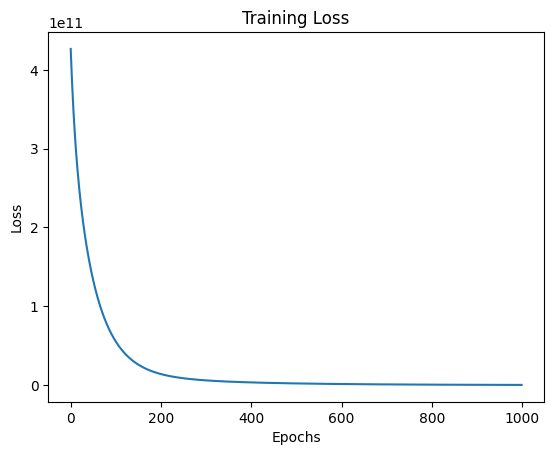

In [ ]:
test_loss = loss((y(data_array_norm,a,b)),data_df['price'])

print("Loss on test data = ",test_loss)

# Visualization of loss

plt.plot(range(epochs),np.array(gradient_descent(data_array_norm,data_df['price'].values,learning_rate=0.01,epochs=1000)[0]))                   # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [ ]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])
x_train.shape

No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


(60000, 28, 28)

label: 7       2       5       9       8       

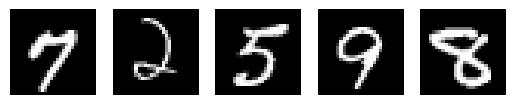

Unique values: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")
plt.show()
y_train.shape
import pandas as pd
unique_values = np.unique(y_train)
print("Unique values:", unique_values)

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [ ]:
# Flatten the images into 1-d vectors

x_train_flatten =  x_train.reshape(x_train.shape[0], -1)                                     # flatten the images of training set
x_test_flatten =  x_test.reshape(x_test.shape[0], -1)                                   # flatten the images of test set


# Divide the training data into training and validation data....
from tensorflow.keras.utils import to_categorical
num_classes = 10
n_validation = 10000                                       # choose number of images to be used for validation

x_validation = x_train_flatten[:n_validation]
y_validation = y_train[:n_validation]

x_train = x_train[n_validation:]
y_train = y_train[n_validation:]
x_train_flatten.shape
y_train.shape
x_train = x_train.reshape(x_train.shape[0], -1)
y_train_encoded = to_categorical(y_train, num_classes)
y_validation_encoded = to_categorical(y_validation, num_classes)


### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Use softmax for multi-class classification with 10 classes
])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary
print(x_train.shape)
print(y_train.shape)

(50000, 784)
(50000,)


#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [ ]:
model.compile(optimizer="adam",loss = "categorical_crossentropy",metrics=["accuracy"])

n_epochs =20           # set number of epochs
batch_size = 512            # you can tweak with these parametrs

history = model.fit(x_train,y_train_encoded, epochs=n_epochs, batch_size=batch_size, validation_data=(x_validation, y_validation_encoded))

Epoch 1/20
98/98 [==============================] - 2s 10ms/step - loss: 6.7259 - accuracy: 0.7546 - val_loss: 1.3746 - val_accuracy: 0.8261
Epoch 2/20
98/98 [==============================] - 1s 8ms/step - loss: 0.9899 - accuracy: 0.8424 - val_loss: 0.8105 - val_accuracy: 0.8510
Epoch 3/20
98/98 [==============================] - 1s 9ms/step - loss: 0.5896 - accuracy: 0.8784 - val_loss: 0.6428 - val_accuracy: 0.8725
Epoch 4/20
98/98 [==============================] - 1s 8ms/step - loss: 0.4254 - accuracy: 0.9040 - val_loss: 0.5738 - val_accuracy: 0.8925
Epoch 5/20
98/98 [==============================] - 1s 12ms/step - loss: 0.3289 - accuracy: 0.9230 - val_loss: 0.4973 - val_accuracy: 0.9055
Epoch 6/20
98/98 [==============================] - 1s 13ms/step - loss: 0.2637 - accuracy: 0.9322 - val_loss: 0.4943 - val_accuracy: 0.9137
Epoch 7/20
98/98 [==============================] - 1s 14ms/step - loss: 0.2219 - accuracy: 0.9408 - val_loss: 0.4364 - val_accuracy: 0.9163
Epoch 8/20
98/98

### **Evaluate**
Evaluate your model on test data.

And Show some results

In [ ]:
results = model.evaluate(...)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(..., label="Training accuracy")
plt.plot(..., label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
...


ValueError: Failed to find data adapter that can handle input: <class 'ellipsis'>, <class 'NoneType'>

Lets show our results on images from testing dataset

In [ ]:
n =5   # = no. of images to see predictions on

index = np.random.choice(x_test)  # choose random index from test data
print("label: ")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(...)             # fill code to show images from test set
    plt.axis("off")
    print(y_test[ind],end="       ")

plt.show()
print("Predicted value: ")

# Now lets print the predictions

for i,ind in enumerate(index):
    # write code to predict and print digit in image
    # Hint: the output of the model is a 10-d vector which gives probabilties
    # The digit in the image would be the class for which probability is hghest...

    digit = ...
    print(digit,end="      ")